<a href="https://colab.research.google.com/github/ratiarumfy/DataScienceProject/blob/main/Final_Project_CPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('ConsumerPriceIndicies.xlsx')
pd.options.display.float_format = '{:.2f}'.format
df.head()

,End of Period,Inflation Rate,"Food, Beverages, and Tobacco",Clothing and Footwear,"Housing,Water, Electricity and Household Fuels","Furnishings, Houshold Equipment and Routine Household Maintenance",Health,Transport,Communication and Financial Services,"Recreation, Sport and Culture",Education Services,Food and Beverages Services/Restaurants,Personal Care and Other Services
0,2020-01-01,0.39,105.89,104.45,102.61,104.82,105.30,102.97,100.46,103.33,106.07,105.42,106.43
1,2020-02-01,0.28,106.90,104.67,102.70,104.88,105.66,102.59,100.45,103.40,106.09,105.60,106.87
2,2020-03-01,0.10,107.01,104.80,102.72,105.17,105.88,102.15,100.36,103.42,106.09,105.98,107.93
3,2020-04-01,0.08,107.11,104.84,102.81,105.26,106.12,101.72,100.02,103.45,106.09,106.17,109.22
4,2020-05-01,0.07,106.77,104.93,102.85,105.36,106.41,102.61,100.10,103.51,106.09,106.25,109.35


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   End of Period                                                       59 non-null     datetime64[ns]
 1   Inflation Rate                                                      59 non-null     float64       
 2   Food, Beverages, and Tobacco                                        59 non-null     float64       
 3   Clothing and Footwear                                               59 non-null     float64       
 4   Housing,Water, Electricity and Household Fuels                      59 non-null     float64       
 5   Furnishings, Houshold Equipment and Routine Household Maintenance   59 non-null     float64       
 6   Health                                                      

In [ ]:
df.shape

(59, 13)

In [ ]:
df.isnull().sum()

,0
End of Period,0
Inflation Rate,0
"Food, Beverages, and Tobacco",0
Clothing and Footwear,0
"Housing,Water, Electricity and Household Fuels",0
"Furnishings, Houshold Equipment and Routine Household Maintenance",0
Health,0
Transport,0
Communication and Financial Services,0
"Recreation, Sport and Culture",0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['End of Period'] = pd.to_datetime(df['End of Period'])
df['Date'] = df['End of Period'].dt.strftime('%B %Y')

In [ ]:
df.drop(columns=['End of Period'], inplace=True)

In [ ]:
df.describe()

,Inflation Rate,"Food, Beverages, and Tobacco",Clothing and Footwear,"Housing,Water, Electricity and Household Fuels","Furnishings, Houshold Equipment and Routine Household Maintenance",Health,Transport,Communication and Financial Services,"Recreation, Sport and Culture",Education Services,Food and Beverages Services/Restaurants,Personal Care and Other Services
count,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00
mean,0.21,111.31,105.93,103.91,107.77,108.52,107.79,99.91,105.13,108.25,109.60,113.80
std,0.28,5.47,2.06,2.08,4.05,3.45,6.94,0.25,2.09,3.27,4.14,5.21
min,-0.21,105.18,102.21,102.14,102.84,103.16,101.72,99.48,103.32,102.95,104.38,106.18
25%,0.04,108.55,104.89,102.81,105.30,106.27,102.91,99.64,103.86,106.09,106.37,110.94
50%,0.16,109.25,105.77,103.02,106.74,108.49,103.47,100.05,104.27,107.76,108.67,112.72
75%,0.37,111.17,106.75,103.52,108.36,109.42,109.87,100.08,104.97,109.42,110.22,113.70
max,1.17,125.10,109.65,108.08,115.69,114.94,122.14,100.46,110.09,114.67,117.83,125.01


## EDA

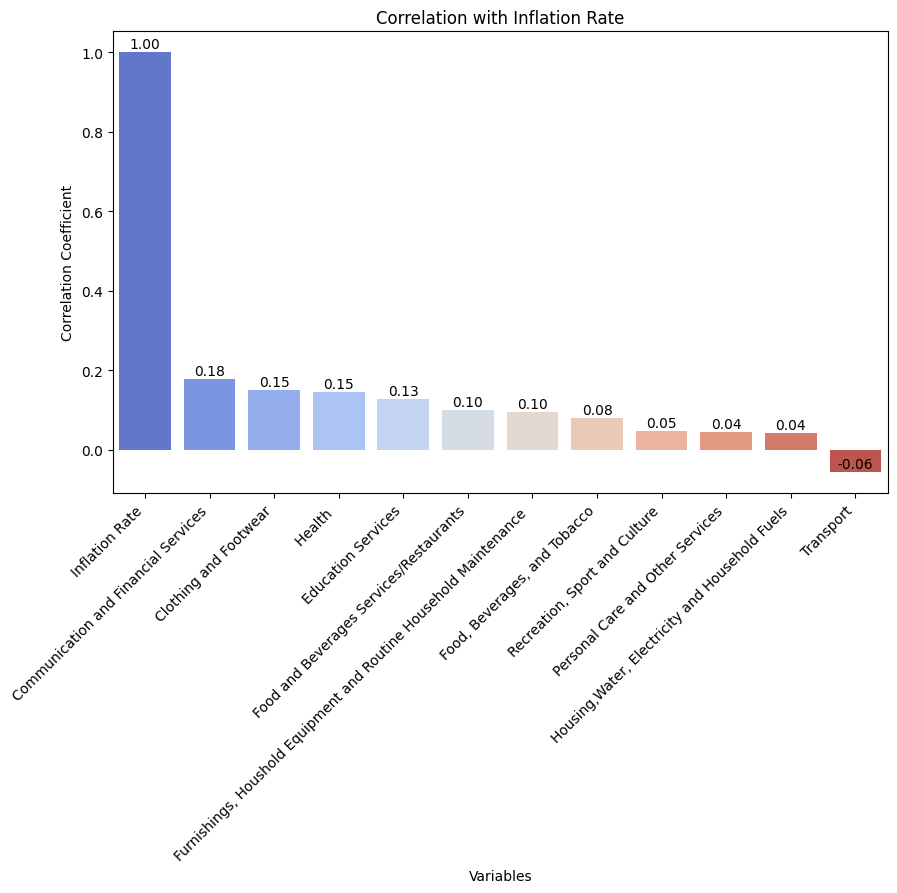

In [ ]:
#korelasi variabel dengan inflation rate

numerical = df.select_dtypes(include=['float64']) #kolom tipe float

corr_inf = numerical.corr()['Inflation Rate'].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=corr_inf.index, y=corr_inf.values, palette='coolwarm')
for idx, value in enumerate(corr_inf.values): #membuat legend
  plt.text(x=idx, y=value + 0.01, s=f'{value:.2f}', ha='center')

plt.title('Correlation with Inflation Rate')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Variables')
plt.show()

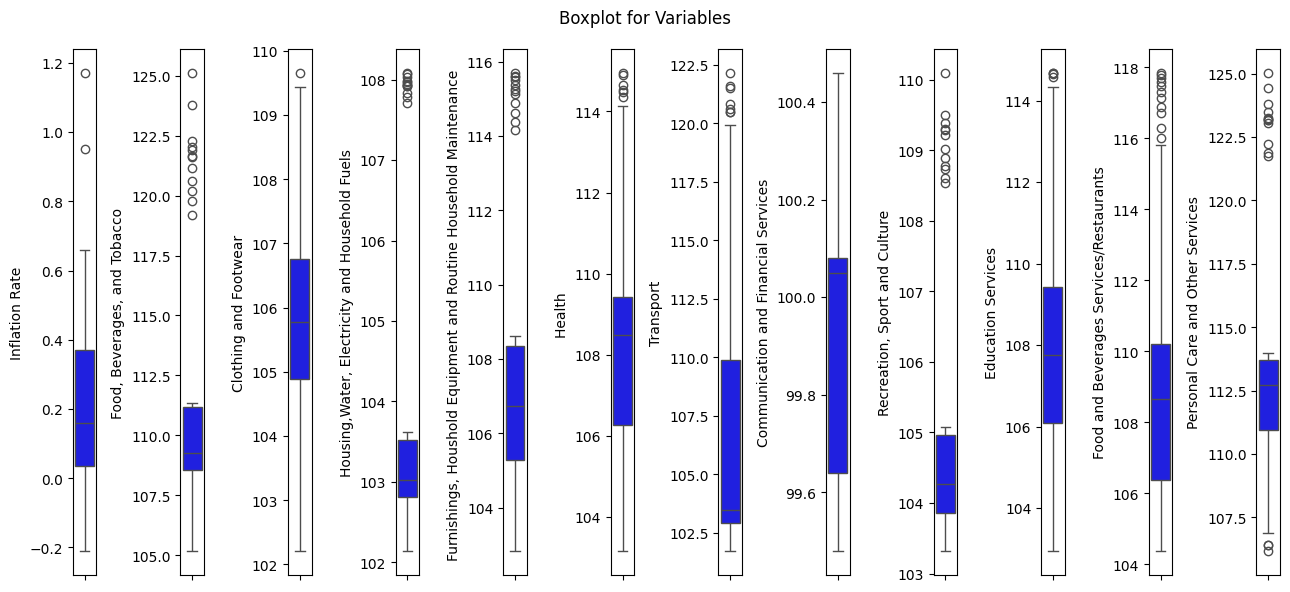

In [ ]:
#boxplot outlier

column_num = df.select_dtypes(include=['float64']).columns #kolom tipe float

plt.figure(figsize=(13,6))
for i, column in enumerate(column_num):
    plt.subplot(1, len(column_num), i+1) #membuat subplot
    sns.boxplot(y=df[column], color='blue')

plt.suptitle('Boxplot for Variables')
plt.tight_layout()

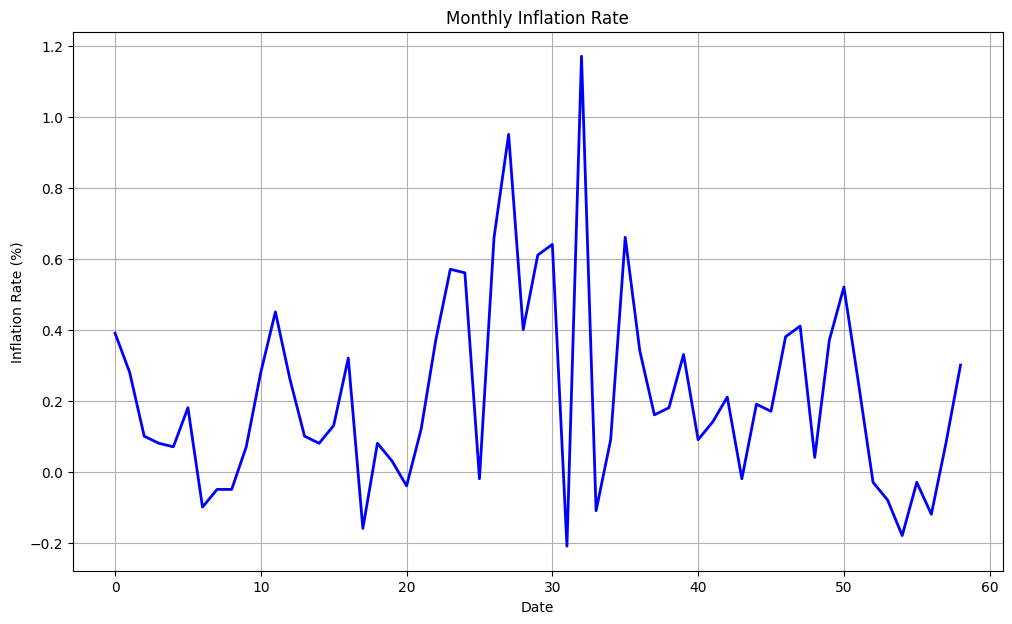

In [ ]:
#line chart time series inflation rate

plt.figure(figsize=(12,7))
plt.plot(df.index, df['Inflation Rate'], label='Inflation Rate', color='blue', linewidth=2)
plt.title('Monthly Inflation Rate')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.show()

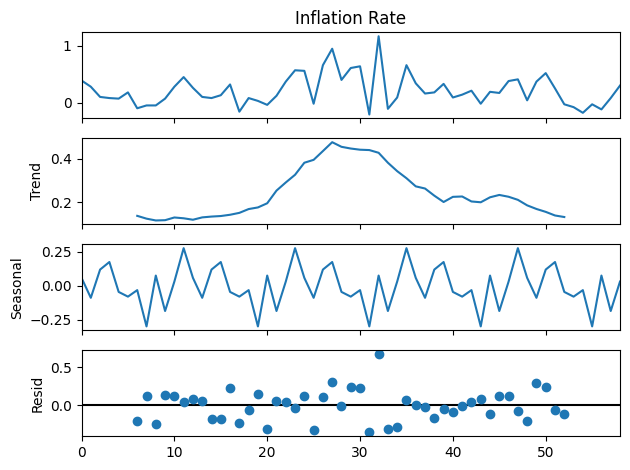

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Inflation Rate'], model='additive', period=12)
result.plot()
plt.show()

In [ ]:
component_cols = [col for col in column_num if col not in ['Inflation Rate']]
highest_cont = df[component_cols].idxmax(axis=1)
df['Highest Contributor'] = highest_cont

In [ ]:
df.tail(5)

,Inflation Rate,"Food, Beverages, and Tobacco",Clothing and Footwear,"Housing,Water, Electricity and Household Fuels","Furnishings, Houshold Equipment and Routine Household Maintenance",Health,Transport,Communication and Financial Services,"Recreation, Sport and Culture",Education Services,Food and Beverages Services/Restaurants,Personal Care and Other Services,Date,Highest Contributor
54,-0.18,109.23,103.07,102.40,103.59,103.85,109.84,99.56,103.98,103.86,105.76,110.18,July 2024,Personal Care and Other Services
55,-0.03,108.66,103.16,102.43,103.63,103.92,110.08,99.54,104.02,104.53,105.88,110.73,August 2024,Personal Care and Other Services
56,-0.12,108.02,103.21,102.47,103.75,103.96,109.90,99.53,104.07,104.83,106.02,111.15,September 2024,Personal Care and Other Services
57,0.08,108.12,103.26,102.55,103.81,104.12,109.33,99.50,104.12,104.87,106.28,112.20,October 2024,Personal Care and Other Services
58,0.30,108.96,103.27,102.59,103.84,104.27,109.44,99.48,104.17,104.87,106.46,112.93,November 2024,Personal Care and Other Services


Personal Care and Other Services                                     6714.27
Food, Beverages, and Tobacco                                         6567.31
Food and Beverages Services/Restaurants                              6466.63
Health                                                               6402.56
Education Services                                                   6386.53
Transport                                                            6359.53
Furnishings, Houshold Equipment and Routine Household Maintenance    6358.50
Clothing and Footwear                                                6249.95
Recreation, Sport and Culture                                        6202.94
Housing,Water, Electricity and Household Fuels                       6130.87
Communication and Financial Services                                 5894.87
dtype: float64


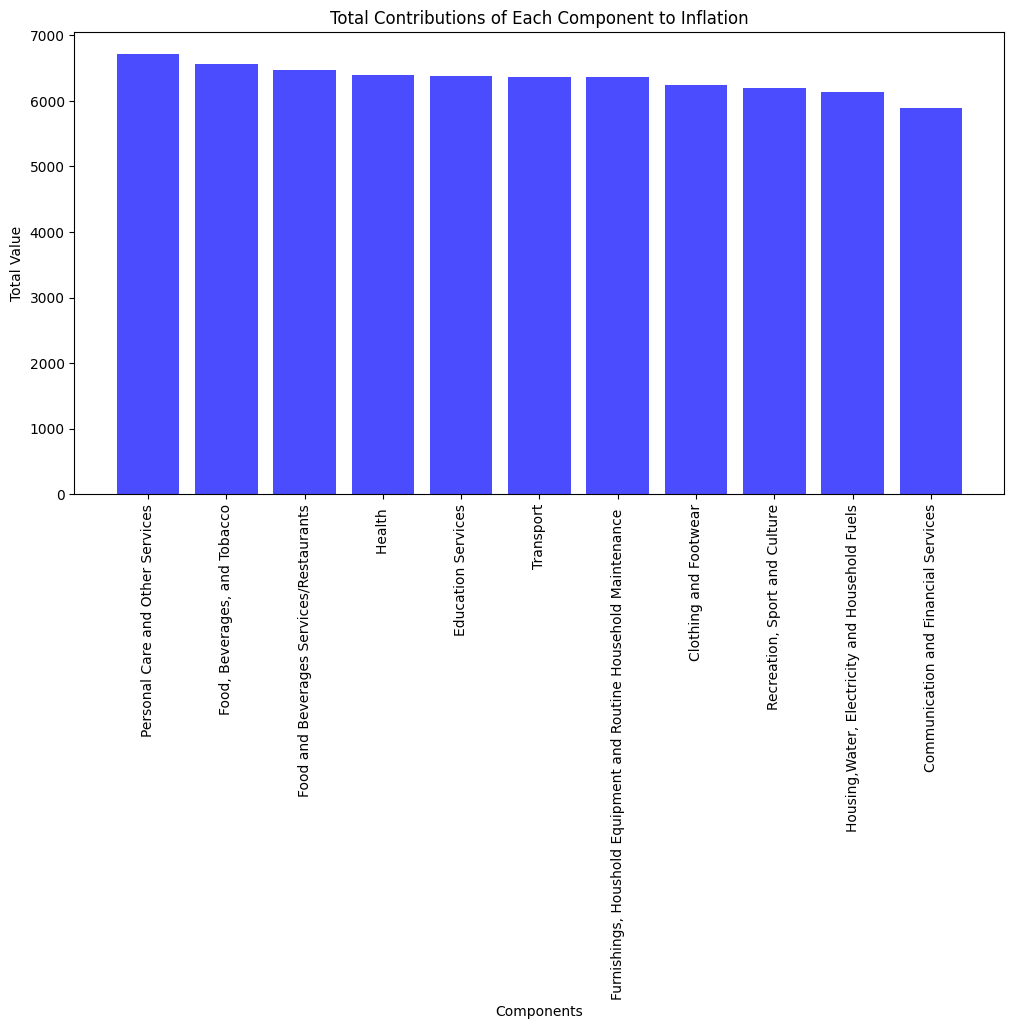

In [ ]:
#melihat komponen yang paling banyak kontribusi

total_cont = df[component_cols].sum()
total_cont.sort_values(ascending=False, inplace=True)
print(total_cont)

plt.figure(figsize=(12,6))
plt.bar(total_cont.index, total_cont.values, color='blue', alpha=0.7)
plt.title('Total Contributions of Each Component to Inflation')
plt.xlabel('Components')
plt.ylabel('Total Value')
plt.xticks(rotation=90)
plt.show()

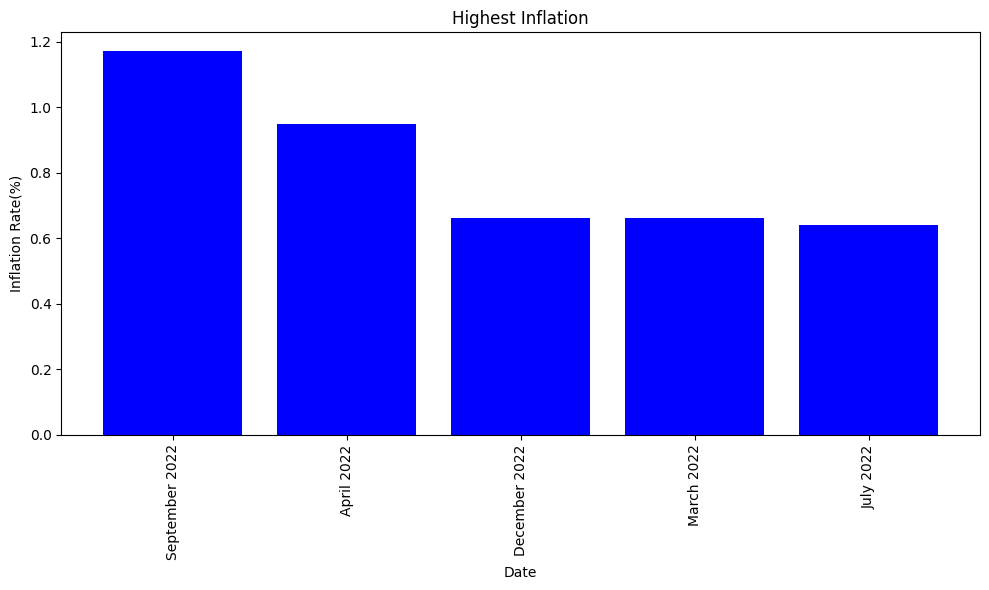

In [ ]:
top_inflation = df.sort_values(by='Inflation Rate', ascending=False).head(5)

plt.figure(figsize=(10,6))
plt.bar(top_inflation['Date'], top_inflation['Inflation Rate'], color='blue')
plt.title('Highest Inflation')
plt.xlabel('Date')
plt.ylabel('Inflation Rate(%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Inflasi tertinggi dalam bulanan yaitu pada bulan September 2022, April 2022, Desember 2022, Maret 2022, dan July 2022.

## Feature Engineering

In [ ]:
print(df['Personal Care and Other Services'].apply(type).value_counts())

Personal Care and Other Services
<class 'float'>    59
Name: count, dtype: int64


In [ ]:
df['Personal Care and Other Services'] = pd.to_numeric(df['Personal Care and Other Services'], errors='coerce')
print(df['Personal Care and Other Services'].isna().sum())

0


In [ ]:
from sklearn.preprocessing import StandardScaler

#standarisasi fitur cpi
component_col = [col for col in df.columns if col not in['Inflation Rate', 'Date', 'Highest Contributor']]
df[component_col] = df[component_col].apply(lambda x: np.log1p(x)) #log(1+x) untuk menghindari log(0)

In [ ]:
# split data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[component_col]
y = df['Inflation Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)
print(f'R2 score: {r2_score(y_test, y_pred_ridge)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}')

R2 score: -0.4813697466998801
RMSE: 0.18601424570268965


## Lasso Regression

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)
print(f'R2 score: {r2_score(y_test, y_pred_lasso)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}')

R2 score: -0.13911527116894074
RMSE: 0.16311665505638245


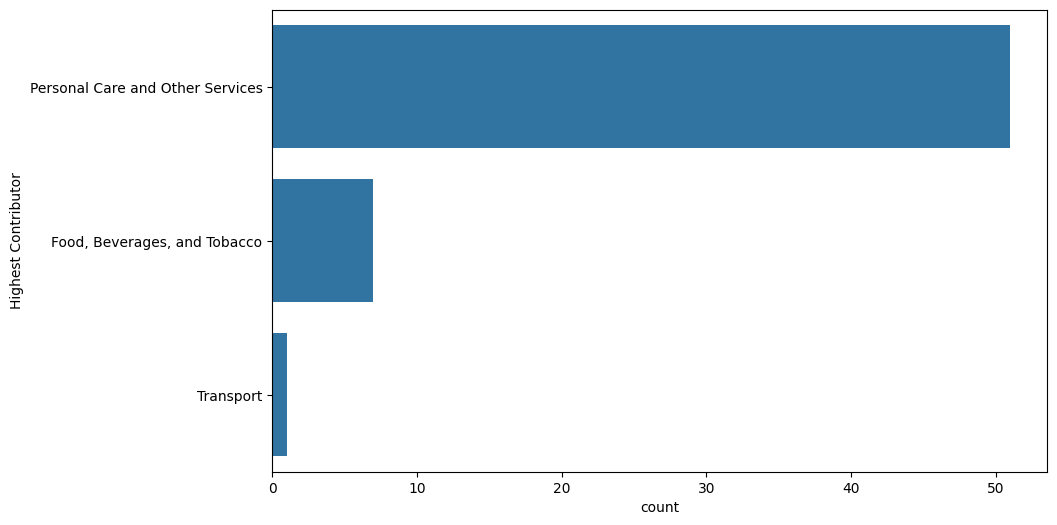

In [ ]:
df['Highest Contributor'] = df[component_col].idxmax(axis=1)
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Highest Contributor', order=df['Highest Contributor'].value_counts().index)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

#parameter tuning
param_grid = {'alpha':[ 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

#grid search ridge
ridge_grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
print('Best Alpha for Ridge:', ridge_grid.best_params_['alpha'])
print('Best MSE for Ridge:', -ridge_grid.best_score_)

#grid search lasso
lasso_grid = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
print('Best Alpha for Lasso:', lasso_grid.best_params_['alpha'])
print('Best MSE for Lasso:', -lasso_grid.best_score_)

Best Alpha for Ridge: 0.001
Best MSE for Ridge: 0.09021448840166732
Best Alpha for Lasso: 0.01
Best MSE for Lasso: 0.09068228889307064


In [ ]:
from sklearn.model_selection import cross_val_score

#evaluasi ridge dengan cross validation
cv_scores_ridge = cross_val_score(Ridge(alpha=0.001), X, y, cv=5, scoring='neg_mean_squared_error')
print('Ridge CV MSE:', -cv_scores_ridge.mean())

#evaluasi lasso dengan cross validation
cv_scores_lasso = cross_val_score(Lasso(alpha=0.01), X, y, cv=5, scoring='neg_mean_squared_error')
print('Lasso CV MSE:', -cv_scores_lasso.mean())

Ridge CV MSE: 0.1144924279400615
Lasso CV MSE: 0.08302013088530164


In [ ]:
#final ridge dan lasso model dengan alpha terbaik

ridge_best = Ridge(alpha=ridge_grid.best_params_['alpha'])
ridge_best.fit(X_train_scaled, y_train)

lasso_best = Lasso(alpha=lasso_grid.best_params_['alpha'])
lasso_best.fit(X_train_scaled, y_train)

#evaluasi model
ridge_preds = ridge_best.predict(X_test_scaled)
lasso_preds = lasso_best.predict(X_test_scaled)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_preds))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_preds))

print(f'Ridge Test RMSE:{ridge_rmse}')
print(f'Lasso Test RMSE: {lasso_rmse}')

Ridge Test RMSE:0.2450693874526875
Lasso Test RMSE: 0.17253341315150586


In [ ]:
future_cpi = X_test_scaled[-12:]
y_forecast_ridge = ridge_best.predict(future_cpi)
y_forecast_lasso = lasso_best.predict(future_cpi)

ridge_forecast_df = pd.DataFrame({'Date': pd.date_range(start='2025-01', periods=12, freq='M'), 'Ridge Forecast': y_forecast_ridge})
lasso_forecast_df = pd.DataFrame({'Date': pd.date_range(start='2025-01', periods=12, freq='M'), 'Lasso Forecast': y_forecast_lasso})

print(ridge_forecast_df)
print(lasso_forecast_df)

         Date  Ridge Forecast
0  2025-01-31           -0.03
1  2025-02-28            0.25
2  2025-03-31            0.21
3  2025-04-30            0.33
4  2025-05-31            0.10
5  2025-06-30            0.05
6  2025-07-31            0.00
7  2025-08-31            0.33
8  2025-09-30            0.46
9  2025-10-31            0.49
10 2025-11-30            0.00
11 2025-12-31            0.44
         Date  Lasso Forecast
0  2025-01-31            0.16
1  2025-02-28            0.22
2  2025-03-31            0.27
3  2025-04-30            0.28
4  2025-05-31            0.22
5  2025-06-30            0.12
6  2025-07-31            0.06
7  2025-08-31            0.28
8  2025-09-30            0.30
9  2025-10-31            0.29
10 2025-11-30            0.12
11 2025-12-31            0.25


## Prophet Model Forecasting

In [ ]:
pip install prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwiiwmbqj/avwtik_8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwiiwmbqj/f_nirdgt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78957', 'data', 'file=/tmp/tmpwiiwmbqj/avwtik_8.json', 'init=/tmp/tmpwiiwmbqj/f_nirdgt.json', 'output', 'file=/tmp/tmpwiiwmbqj/prophet_modelj73k9nd7/prophet_model-20250108050605.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:06:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:06:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE prophet: 0.5261642318188547
           ds  yhat  yhat_lower  yhat_upper
0  2025-01-31  0.47        0.21        0.75
1  2025-02-28  0.39        0.11        0.67
2  2025-03-31  0.77        0.49        1.05
3  2025-04-30  0.16       -0.12        0.43
4  2025-05-31  0.36        0.09        0.64
5  2025-06-30  0.70        0.42        0.96
6  2025-07-31 -0.10       -0.37        0.17
7  2025-08-31  1.00        0.72        1.27
8  2025-09-30  0.09       -0.18        0.37
9  2025-10-31  0.29        0.00        0.57
10 2025-11-30  0.87        0.58        1.14
11 2025-12-31  0.70        0.42        1.00


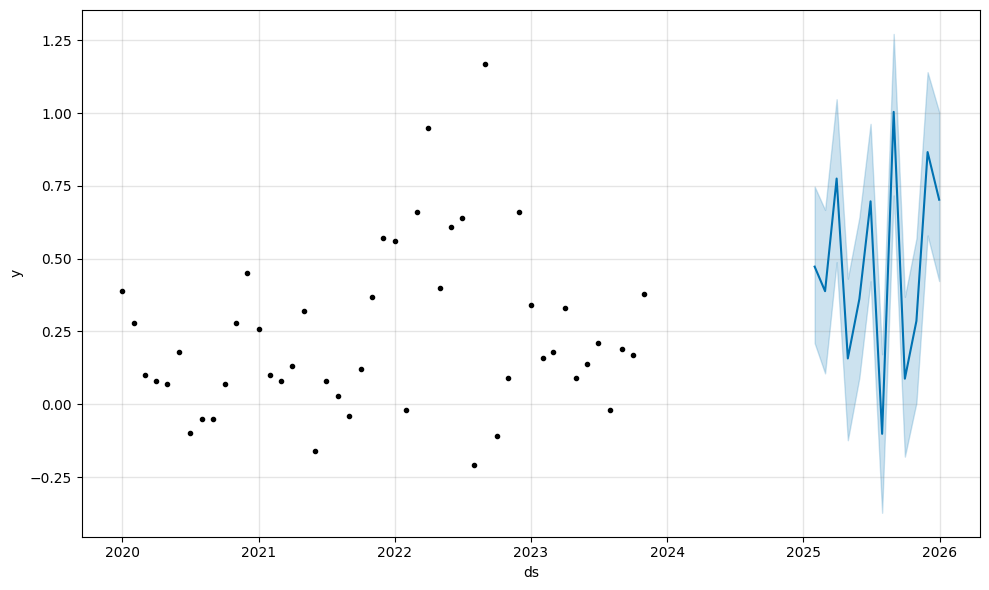

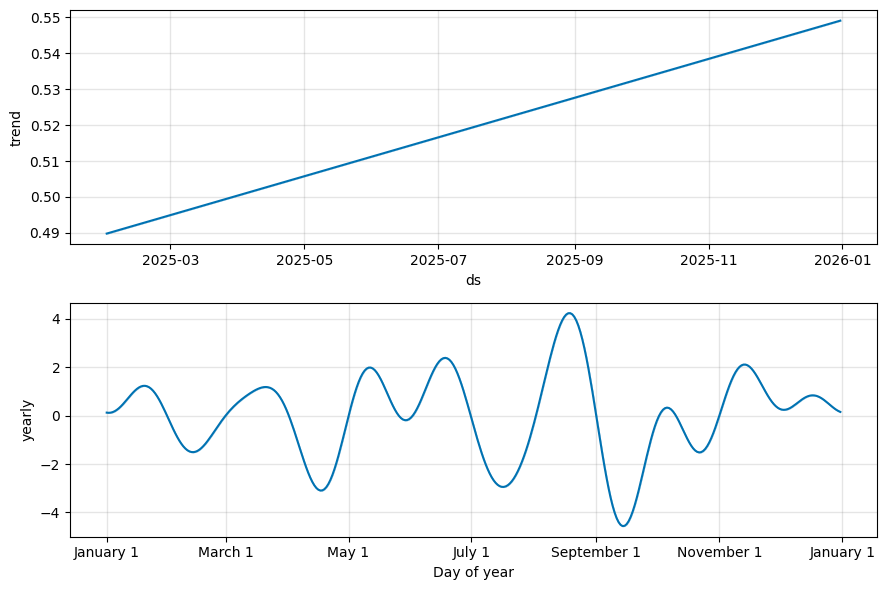

In [ ]:
from prophet import Prophet

df_prophet = df[['Date', 'Inflation Rate']].rename(columns={'Date':'ds', 'Inflation Rate':'y'})

#split data
prophet_train = df_prophet.iloc[:-12]
prophet_test = df_prophet.iloc[-12:]

#fit model
model = Prophet()
model.fit(prophet_train)

#forecast
future = pd.date_range(start='2025-01', periods=12, freq='M')
future_df = pd.DataFrame({'ds': future})

forecast = model.predict(future_df)

y_test_prophet = prophet_test['y'].values
y_pred_prophet = forecast['yhat'].values
prophet_rmse = np.sqrt(mean_squared_error(y_test_prophet, y_pred_prophet))

print(f'RMSE prophet: {prophet_rmse}')
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(12))

fig = model.plot(forecast)
fig2 = model.plot_components(forecast)
plt.show()